In [ ]:
!pip install --upgrade keras==3.1.1

In [ ]:
!pip install --upgrade tensorflow==2.16.1

In [1]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import numpy as np

import random

import os

import tensorflow as tf

import re

from tqdm import tqdm




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
color_img = []
gray_img = []

In [76]:
color_img = cv2.imread("Test/org/174.jpg")
gray_img = cv2.imread("Test/174.jpg")

color_img = (cv2.resize(color_img, (256,256)).astype("float32")/255.0).reshape(-1,256,256,3)
gray_img = (cv2.resize(gray_img, (256,256)).astype("float32")/255.0).reshape(-1,256,256,3)

In [74]:
color_img = cv2.imread("Test/test1.jpg")
gray_img = cv2.cvtColor(cv2.cvtColor(cv2.imread("Test/test1.jpg"), cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)

color_img = (cv2.resize(color_img, (256,256)).astype("float32")/255.0).reshape(-1,256,256,3)
gray_img = (cv2.resize(gray_img, (256,256)).astype("float32")/255.0).reshape(-1,256,256,3)

In [43]:
from keras.models import load_model

generator = load_model("../Models/main/generator_model_epoch10.h5")

generator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
g10 = load_model("../Models/main/generator_model_epoch10.h5")
g10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g20 = load_model("../Models/main/generator_model_epoch20.h5")
g20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g25 = load_model("../Models/main/generator_model_epoch25.h5")
g25.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g35 = load_model("../Models/main/generator_model_epoch30.h5")
g35.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g45 = load_model("../Models/main/generator_model_epoch45.h5")
g45.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g50 = load_model("../Models/main/generator_model_epoch50.h5")
g50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epoch 10


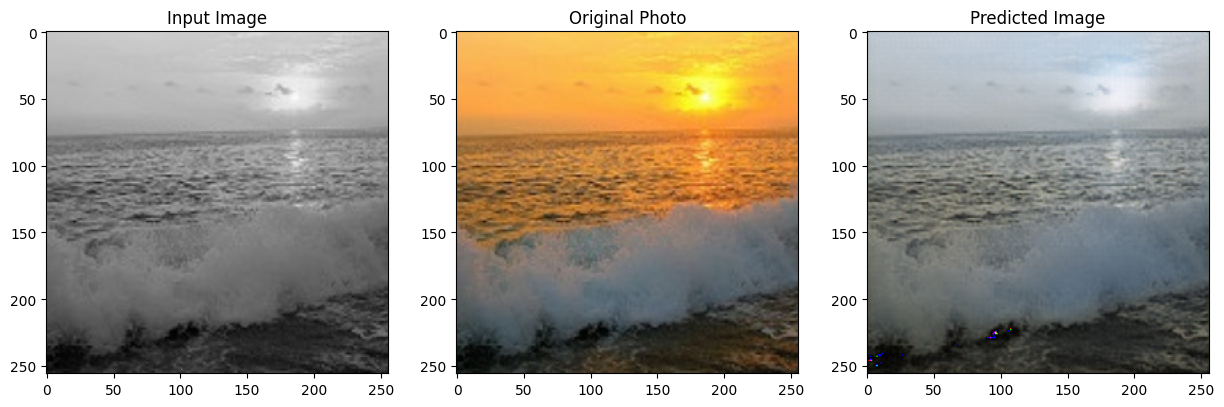

epoch 20


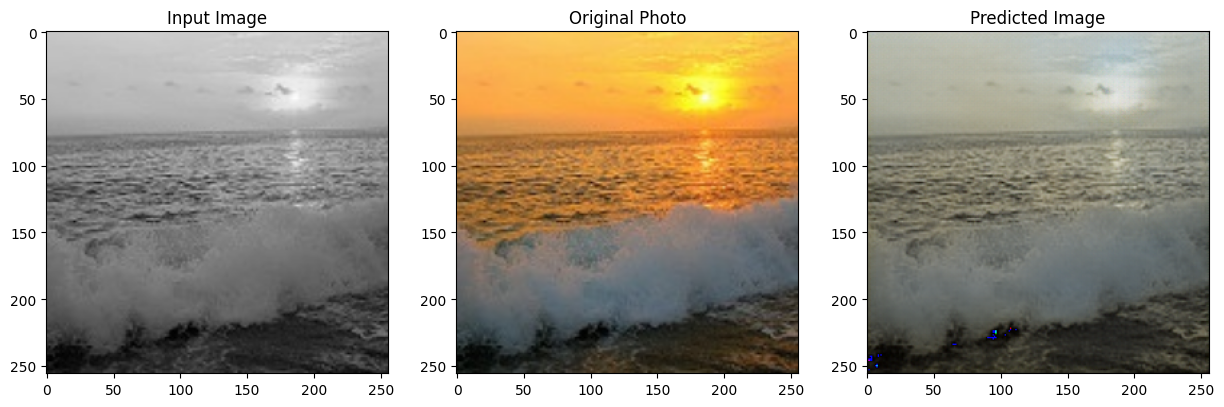

epoch 25


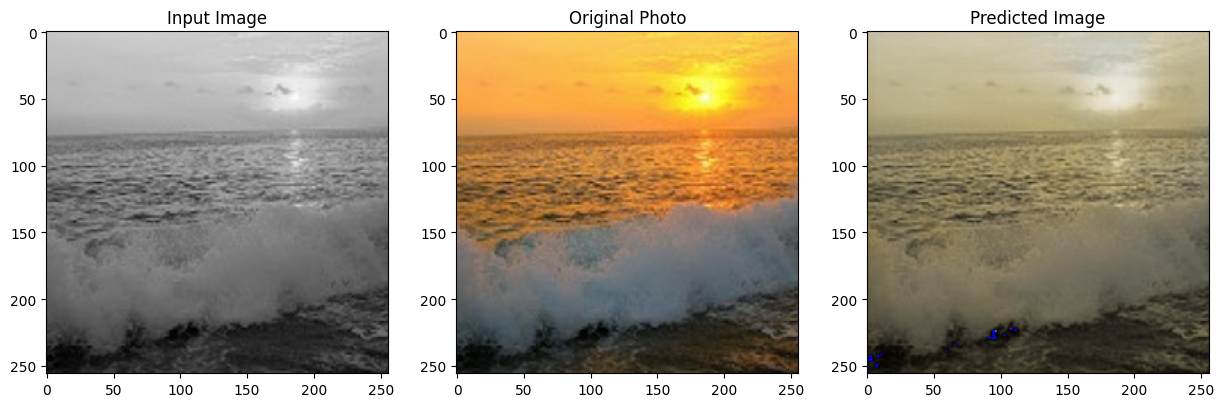

epoch 35


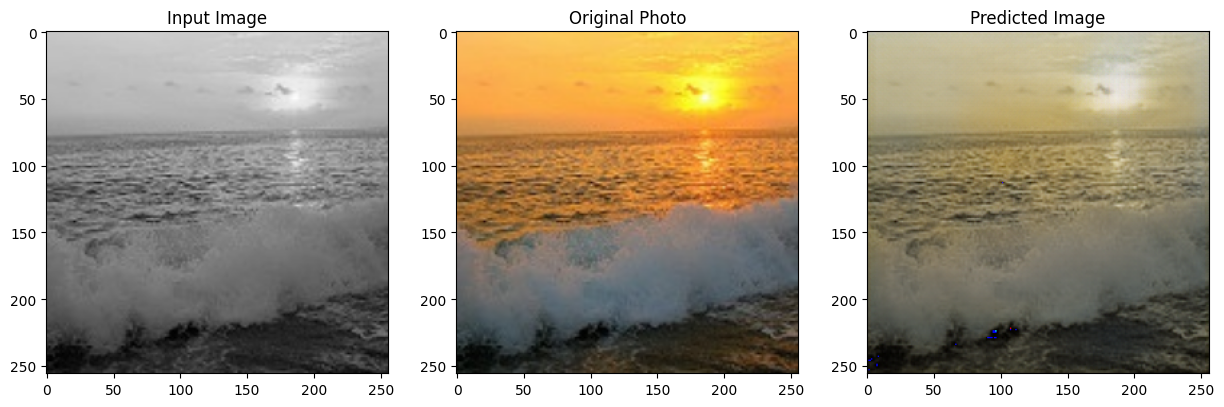

epoch 45


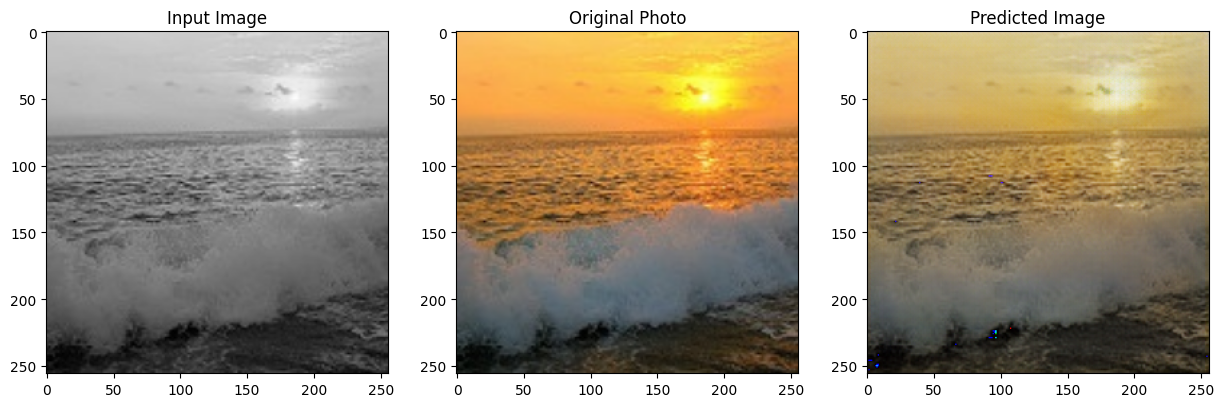

epoch 50


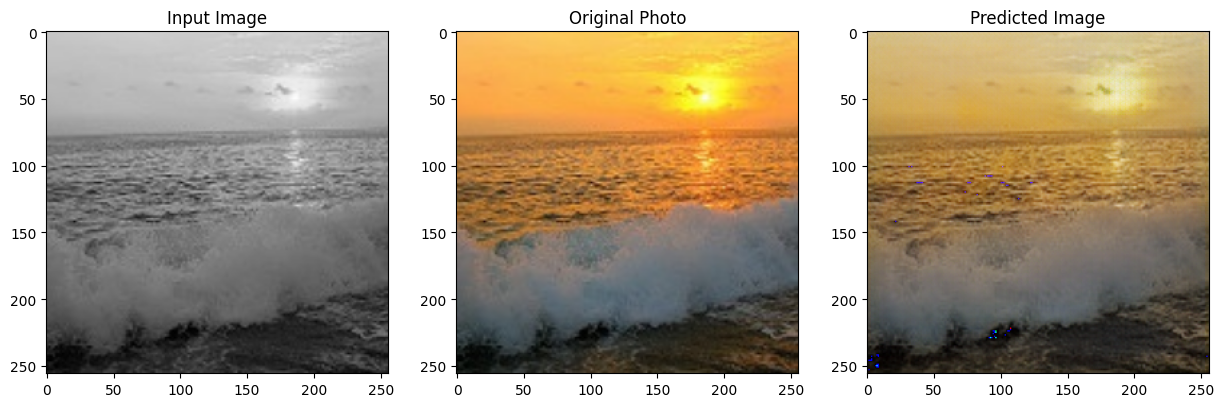

In [77]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)

    # BGR'den RGB'ye dönüşüm
    test_input_rgb = cv2.cvtColor((test_input[0]*255).astype('uint8'), cv2.COLOR_BGR2RGB)
    tar_rgb = cv2.cvtColor((tar[0]*255).astype('uint8'), cv2.COLOR_BGR2RGB)
    prediction_rgb = cv2.cvtColor((np.array(prediction[0])*255).astype('uint8'), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15,15))

    display_list = [test_input_rgb, tar_rgb, prediction_rgb]
    title = ['Input Image', 'Original Photo', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('on')
    plt.show()

    return prediction


print("epoch 10")
pred = generate_images( g10, gray_img, color_img)
print("epoch 20")
pred = generate_images( g20, gray_img, color_img)
print("epoch 25")
pred = generate_images( g25, gray_img, color_img)
print("epoch 35")
pred = generate_images( g35, gray_img, color_img)
print("epoch 45")
pred = generate_images( g45, gray_img, color_img)
print("epoch 50")
pred = generate_images( g50, gray_img, color_img)


# Video



In [11]:
def color_me(input_img, model):
  height, width, _ = input_img.shape
  input_img = cv2.resize(input_img, (256, 256))
  input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
  input_img = input_img.astype('float32') / 255.0

  input_img = input_img.reshape(-1, 256, 256, 3)
  prediction = model(input_img, training=True)

  cur = (np.array(prediction[0])*255).astype('uint8')


  cur = cv2.resize(cur, (width, height))

  return cur





In [12]:
from IPython.display import clear_output


def colorize_video(input_video_path, output_video_name, model):

    cap = cv2.VideoCapture(input_video_path)

    # Video dosyasının genişliği ve yüksekliği alınır
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Video dosyası için bir VideoWriter nesnesi oluştur
    out = cv2.VideoWriter(f'{output_video_name}.mp4', cv2.VideoWriter_fourcc(*'mpv4'), 30, (frame_width, frame_height))
    count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    while True:
        ret, frame = cap.read()  # Bir sonraki kareyi oku
        if not ret:
            break  # Video bitti

        colored_frame = color_me(frame, model)  # Kareyi renklendir
        # colored_frame = cv2.cvtColor(colored_frame, cv2.COLOR_BGR2RGB)
        out.write(colored_frame)  # Renklendirilmiş kareyi video dosyasına yaz


        clear_output(wait=True)
        count += 1
        per:float = count / total_frames * 100
        print(f"Frame % {per}f ")


    # Temizlik
    cap.release()
    out.release()


In [13]:
from datetime import datetime

now = datetime.now()
name = now.strftime("%d%m%Y_%H%M%S")

input_video = "Test/VID_48830720_044431_226.mp4"
output_video = f"Test/d3"

colorize_video(input_video, output_video, generator)

Frame % 99.4186046511628f 


In [ ]:
import os.path

# Check if a file exists using its path.
file_path = "/content/drive/MyDrive/python/VID_48830720_044431_226.mp4"
if os.path.exists(file_path):
    print("The file exists.")
else:
    print("The file does not exist.")

In [ ]:
os.listdir("/content/drive/MyDrive/python")